In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<!-- Reading the excel file and getting initial insights about the data -->

In [3]:
df = pd.read_excel('Dataset.xlsx',sheet_name='E-Commerce Reviews_Data',skiprows=[0,1,2,3,4])

In [4]:
df.columns

Index(['Sl.No', 'Flavour Name', 'Review', 'Link'], dtype='object')

In [5]:
df.head()

,Sl.No,Flavour Name,Review,Link
0,1,Blonde,I really like this beer but I want the rest of...,https://www.amazon.co.uk/gp/customer-reviews/R...
1,2,Ruby,"rubbish, when I ordered it was two days premiu...",https://www.amazon.co.uk/gp/customer-reviews/R...
2,3,Ruby,This is a Berry flavoured beer and tastes real...,https://www.amazon.co.uk/gp/customer-reviews/R...
3,4,Ruby,"Sorry to say didn’t like this at all, but wort...",https://www.amazon.co.uk/gp/customer-reviews/R...
4,5,Ruby,Buyer beware.\nAfter reading reviews about how...,https://www.amazon.co.uk/gp/customer-reviews/R...


In [6]:
df.shape

(73, 4)

<!-- Sentiment analysis on the Ecommerce data -->

In [37]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score >= -0.05 and sentiment_score < 0.05:
        return 'neutral'
    else:
        return 'negative'
    
df['sentiment'] = df['Review'].apply(get_sentiment)

# give the positive, negative and neutral sentiment for each flavor name
df.head()






[nltk_data] Downloading package vader_lexicon to C:\Users\Sahas
[nltk_data]     Vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Sl.No,Flavour Name,Review,Link,sentiment
0,1,Blonde,I really like this beer but I want the rest of...,https://www.amazon.co.uk/gp/customer-reviews/R...,positive
1,2,Ruby,"rubbish, when I ordered it was two days premiu...",https://www.amazon.co.uk/gp/customer-reviews/R...,negative
2,3,Ruby,This is a Berry flavoured beer and tastes real...,https://www.amazon.co.uk/gp/customer-reviews/R...,positive
3,4,Ruby,"Sorry to say didn’t like this at all, but wort...",https://www.amazon.co.uk/gp/customer-reviews/R...,positive
4,5,Ruby,Buyer beware.\nAfter reading reviews about how...,https://www.amazon.co.uk/gp/customer-reviews/R...,positive


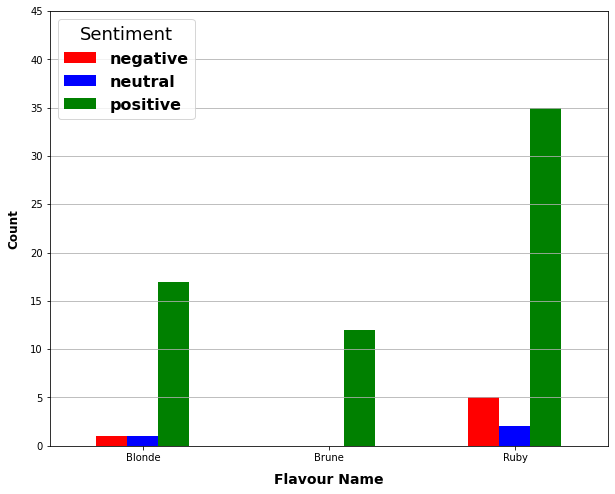

In [40]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Assuming you have sentiment_counts from your previous code
sentiment_counts = df.groupby(['Flavour Name', 'sentiment']).size().unstack(fill_value=0)

# Plot the bar graph
# give the negative in red, positive in green and neutral in blue color, the x-axis is the flavor name and y-axis is the count of each sentiment
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(10, 8))
plt.xlabel('Flavour Name', fontweight='bold', fontsize=14, labelpad=10)  # Customize x-axis label
plt.ylabel('Count', fontweight='bold', fontsize=12, labelpad=10)  # Customize y-axis label

# Customize the legend title
legend_title = 'Sentiment'
font_properties = FontProperties(weight='bold', size=16)
plt.legend(title=legend_title, title_fontsize=18, prop=font_properties)

plt.xticks(rotation=0)

# Set the y-axis limit to a higher value
plt.ylim(0, sentiment_counts.max().max() + 10)

plt.grid(axis='y')

# Display the plot
plt.show()


In [39]:
import pandas as pd

# Group by 'Flavour Name' and 'sentiment' and count occurrences
sentiment_counts = df.groupby(['Flavour Name', 'sentiment']).size().unstack(fill_value=0)

# Display the result
sentiment_counts


sentiment,negative,neutral,positive
Flavour Name,,,
Blonde,1,1,17
Brune,0,0,12
Ruby,5,2,35
